## **Introduction**

<div style="text-align: justify">&emsp; Instagram, Facebook, YouTube, Twitter, TikTok, VK, the Feed channel, and other public platforms are examples of social media platforms. Facebook is now the most popular website for sharing photographs, music, videos, and articles, as well as their own ideas and opinions, with as many people as they want. Users can publish nearly anything to their "timeline," which is a snapshot of what is going on in their social circle at any one time, and can also engage in private discussion with other online friends.</div> <br>
<div style="text-align: justify">&emsp; Many individuals, especially young people who have grown up with technology, have loved using Facebook without recognizing that, despite its beauty, it also has a negative side. Others may obtain your personal information, use your photographs without your consent, and so forth. Sending bulk messages, aggressively publishing links or images to people's timelines, and sending friend requests to people you don't know can all be classified as "Facebook spam."Spam can be distributed by clicking on malicious links or downloading malicious software. As a result, researchers devised this study to at least make users of these platforms aware of the issue, especially that some people have created numerous accounts. </div>

# **Exploratory Data Analysis**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
data = pd.read_csv('../input/facebook-spam-dataset/Facebook Spam Dataset.csv')
data.head()

,profile id,#friends,#following,#community,age,#postshared,#urlshared,#photos/videos,fpurls,fpphotos/videos,avgcomment/post,likes/post,tags/post,#tags/post,Label
0,1,39,300,907,200,1000,850,922,0.490000,0.550000,0.56,0.47,40,14,1
1,2,150,350,30,300,300,100,290,0.330000,0.960000,0.50,1.20,10,4,0
2,3,300,450,50,465,500,150,450,0.200000,0.840000,0.40,1.50,15,7,0
3,4,25,110,660,350,2050,2000,2050,0.975610,1.000000,0.70,0.30,54,21,1
4,5,24,100,150,800,950,1000,900,1.052632,0.947368,0.66,0.50,55,20,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   profile id       600 non-null    int64  
 1   #friends         600 non-null    int64  
 2   #following       600 non-null    int64  
 3   #community       600 non-null    int64  
 4   age              600 non-null    int64  
 5   #postshared      600 non-null    int64  
 6   #urlshared       600 non-null    int64  
 7   #photos/videos   600 non-null    int64  
 8   fpurls           598 non-null    float64
 9   fpphotos/videos  600 non-null    float64
 10  avgcomment/post  600 non-null    float64
 11  likes/post       600 non-null    float64
 12  tags/post        600 non-null    int64  
 13  #tags/post       600 non-null    int64  
 14  Label            600 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 70.4 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
profile id,600.0,301.175000,173.729861,1.000000,150.750000,301.500000,451.250000,601.000000
#friends,600.0,1066.355000,669.497972,4.000000,663.500000,1159.000000,1473.750000,5554.000000
#following,600.0,1068.670000,677.262425,1.000000,658.000000,1132.000000,1473.750000,5312.000000
#community,600.0,207.646667,370.622053,12.000000,39.000000,56.000000,77.000000,1789.000000
age,600.0,1214.605000,471.261985,125.000000,926.500000,1136.000000,1452.250000,2697.000000
#postshared,600.0,1158.115000,835.521159,76.000000,588.250000,876.500000,1410.000000,3896.000000
#urlshared,600.0,369.750000,720.084739,11.000000,38.000000,49.000000,83.000000,2956.000000
#photos/videos,600.0,1120.783333,836.186049,65.000000,563.750000,826.500000,1380.000000,3891.000000
fpurls,598.0,0.187524,0.251282,0.011226,0.042236,0.076777,0.132287,1.086957
fpphotos/videos,600.0,0.961135,0.145149,0.000000,0.930512,0.969883,0.993068,2.739726


The table above is the transposed descriptive statistics for each feature that are in numeric datatype, the table shows the count or number of non-missing instances, it is apparent that `fpurls` have 2 null instances while the rest have no null values. 

In [5]:
eda_df = data
eda_df['Label'].replace([0,1], ['Legitimate', 'Fake'], inplace=True)
eda_df.drop('profile id', axis=1, inplace=True)

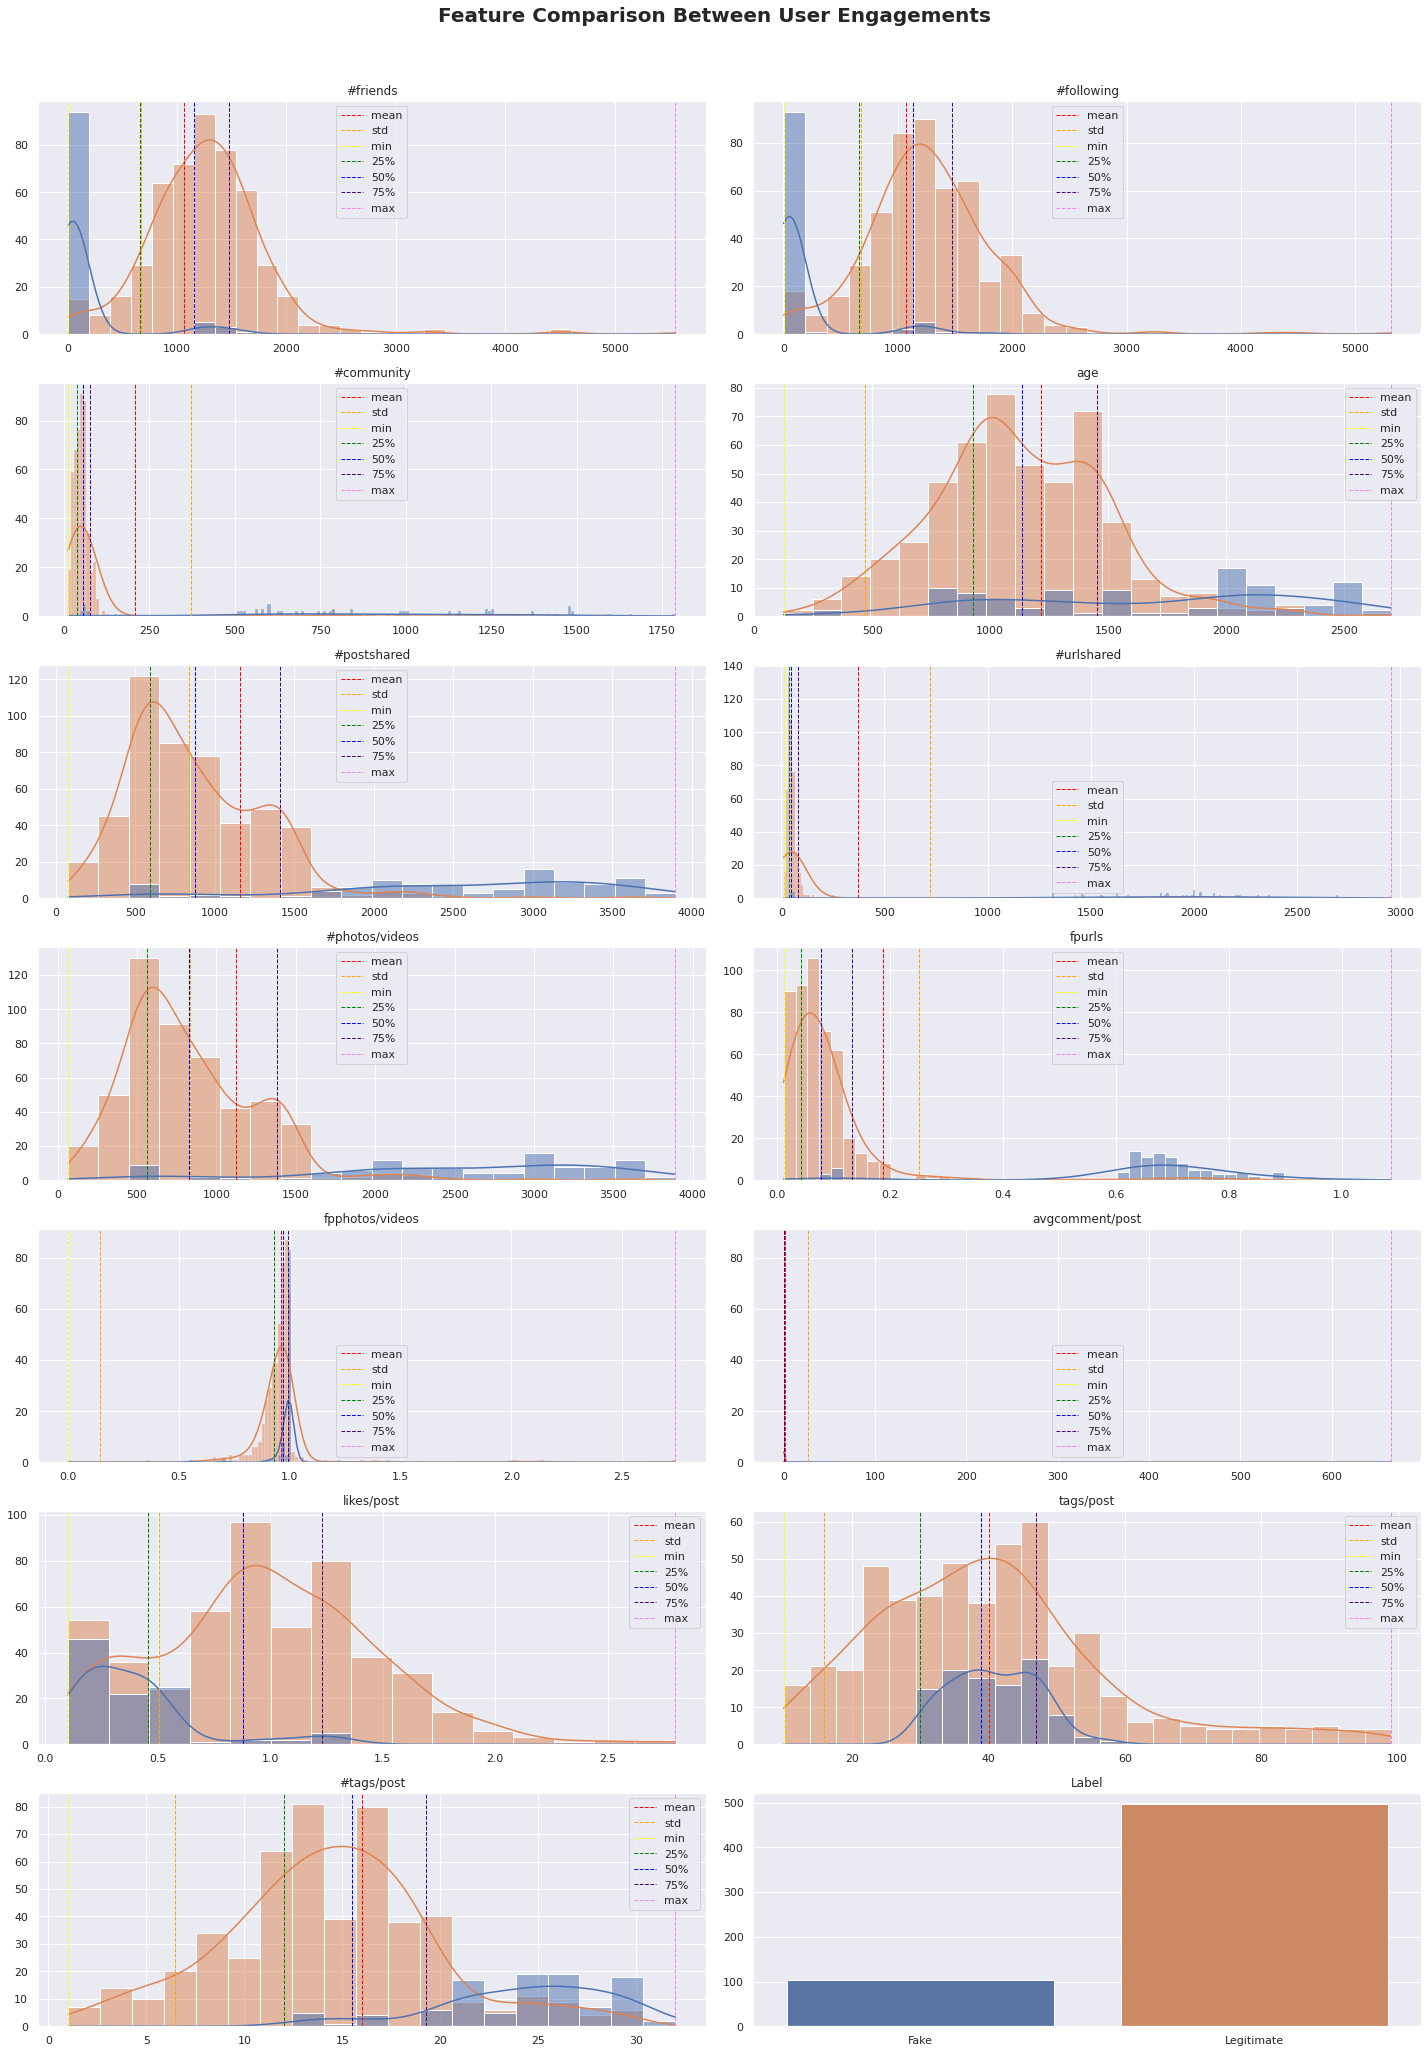

In [6]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']
hists, ax = plt.subplots(7, 2, figsize=(20,30))
count = 0
for row in range(7):
    for col in range(2):
        if count != 13:
            feature = sns.histplot(x=eda_df[eda_df.columns[count]], ax=ax[row,col], kde=True, hue=eda_df['Label'])
            feature.set_xlabel(None)
            feature.set_ylabel(None)
            feature.set_title(eda_df.columns[count])
            
            for desc, color, label in zip(eda_df[eda_df.columns[count]].describe()[1:].values, 
                                          colors, 
                                          eda_df[eda_df.columns[count]].describe()[1:].index):
                feature.axvline(desc, color=color, label=label, linestyle='--', linewidth=1)
            feature.legend()
            
        else:
            feature = sns.countplot(x=eda_df['Label'])
            feature.set_xlabel(None)
            feature.set_ylabel(None)
            feature.set_title(eda_df.columns[count])
            
        count += 1
        
hists.tight_layout(rect=[0, 0.03, 1, 0.95])
hists.suptitle("Feature Comparison Between User Engagements", fontsize=20, fontweight='bold');

**Observations**:

* `#friends`: In this histogram the distribution is irregular and it was skewed to the right.
* `#following`: It is the same to the friends histogram where it was skewed to the right and has an irregular distribution.
* `#community`:In this histogram it seems to concentrate on the left side of the plot.
* `#age`:In terms of the numbers legitimate has the highest contribution and it is a bimodal distribution while the fake ones has a uniform-like distribution.
* `#postshared`:It is skewed to the right and the highest value of the legitimate contribution is 120.
* `#urlshared`: In this histogram it seems to concentrate on the left side of the plot.
* `#photos/videos`:It is skewed to the right and the highest value of the legitimate contribution is 132.
* `#fpurls`:It is skewed to the right and concentrated to the left.
* `#fphotos/videos`:It is skewed to the right and concentrated to the left.
* `#avgcomment/post`:It has a zero value.
* `#likes/post`:It is skewed to the right.
* `#tags/post`:Both legitimate and fake are skewed to the right.
* `#tags/post`: The legitimate was skewed to the right while the fake distribution is a multimodal.
* `#label`:It is obvious that the legitimate has the highest contribution than fake.

In [7]:
def most_highly_correlated(mydataframe, numtoreport):
    cormatrix = mydataframe.corr()
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)\

correlations = most_highly_correlated(eda_df, 10)
correlations.head()

,FirstVariable,SecondVariable,Correlation
0,#postshared,#photos/videos,0.993536
1,#urlshared,fpurls,0.927552
2,#urlshared,#photos/videos,0.901870
3,#community,#urlshared,0.901187
4,#friends,#following,0.896656


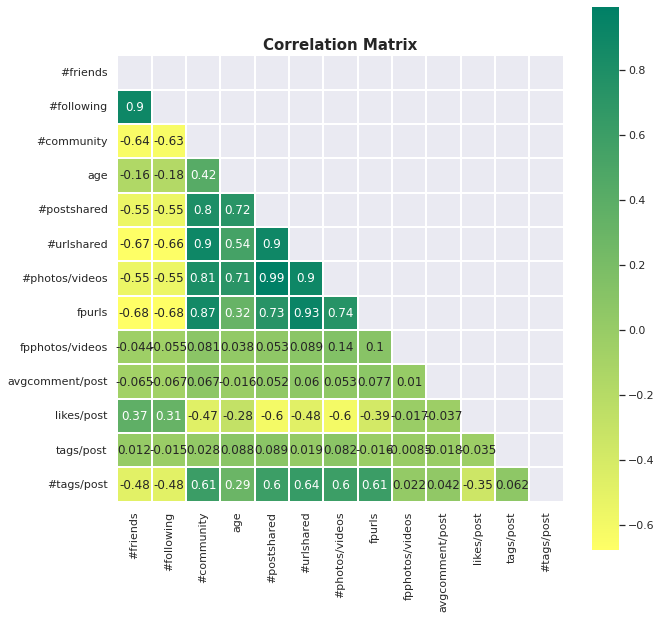

In [8]:
mask = np.triu(np.ones_like(eda_df.corr(), dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(eda_df.corr(), annot=True, cbar=True, cmap='summer_r', square=True, mask=mask, linewidths=0.3)
plt.title("Correlation Matrix", fontsize=15, fontweight='bold');

This heatmap is a visualization of how correlated a feature is relative to other features, correlation has three commonly evaluation. A correlation close to 1 means a positive or high correlation, while a 0 or closer to 0 correlation denotes that the paired features does not have any correlation at all, lastly, a correlation that is close to negative 1 means there is a negative correlation between the two features. For this heatmap, yellow colors denotes negative correlation, and green means high or positive correlation. For the mentioned features, `#photos/videos` and `#postshared` gained the highest correlation with `0.99`, which means that these features shares characteristics and has a strong relationship.

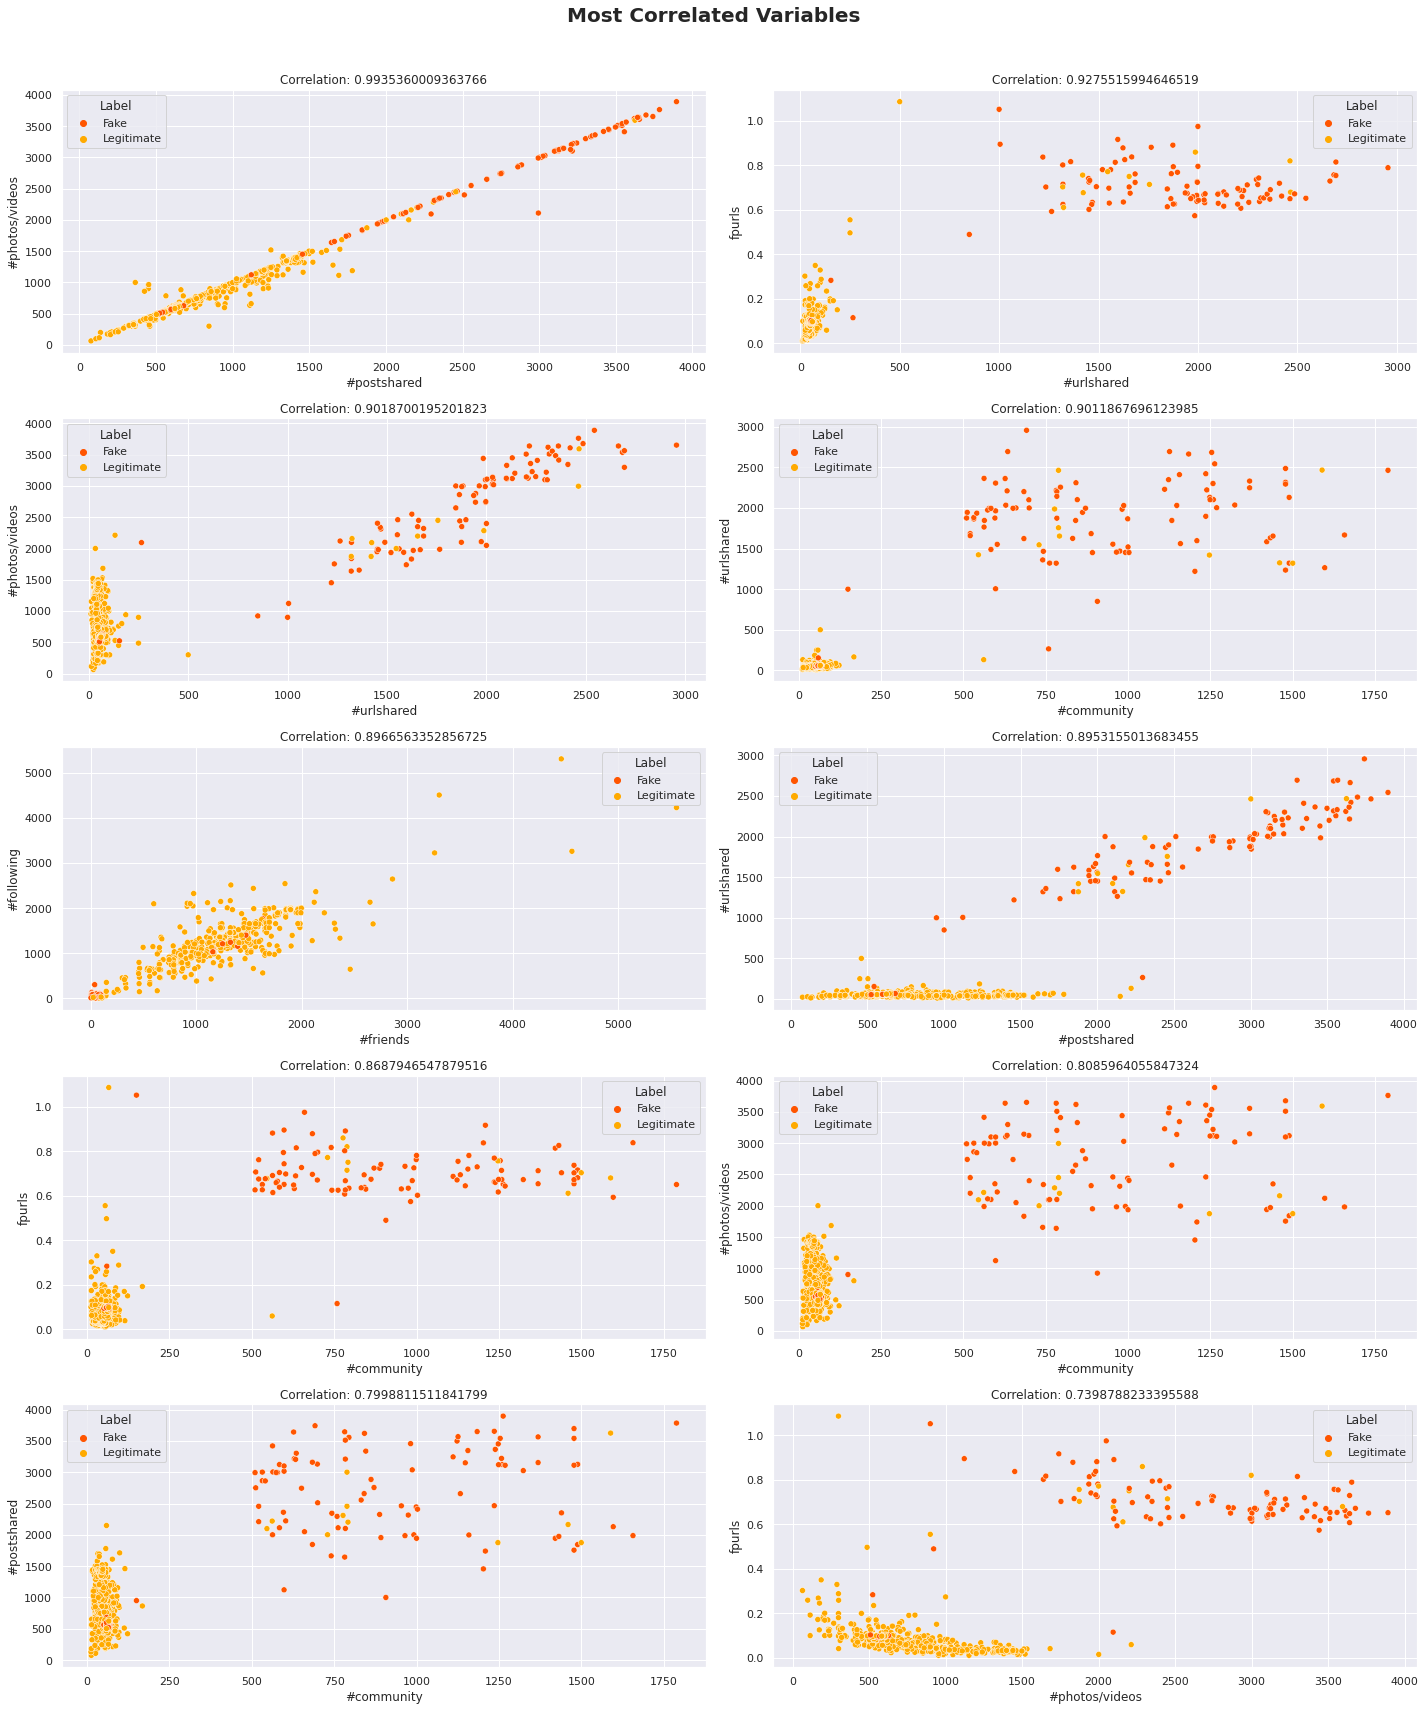

In [9]:
corrs, ax = plt.subplots(5, 2, figsize=(20,25))

c = 0
for i in range(5):
    for j in range(2):
        sns.scatterplot(x=eda_df[correlations.iloc[c,:-1].values[0]], 
                        y=eda_df[correlations.iloc[c,:-1].values[1]], 
                        hue=eda_df['Label'], 
                        ax=ax[i,j], 
                        palette='autumn')
        ax[i,j].set_title(f"Correlation: {correlations['Correlation'][c]}")
        c+=1

corrs.tight_layout(rect=[0, 0.03, 1, 0.95])
corrs.suptitle("Most Correlated Variables", fontsize=20, fontweight='bold');

This scatter plot is a continuation of the correlation analysis above. These scatter plots consists of the top 10 most correlated variables or features. It is apparent that when a pair of features have positive correlation, they formed a diagonal line of points.

**Hypothesis Testing**<br>
**Compare the number of `friends` on a legitimate and fake account**

H0: The Number of friends in both legitimate and fake accounts are equal i.e., μ1 = μ2

H1: The number of friends are not equal i.e., μ1 ≠ μ2

In [10]:
# Hypothesis Testing
from scipy import stats

label_0 = eda_df[eda_df['Label'] == 'Legitimate']
label_1 = eda_df[eda_df['Label'] == 'Fake']

friends_zeros = []
friends_ones = []

for i in range(10_000):
    friends_zeros.append(np.random.choice(label_0['#friends']))
    friends_ones.append(np.random.choice(label_1['#friends']))

t_value,p_value = stats.ttest_ind(friends_zeros, friends_ones, equal_var=True)
a = 0.05

if p_value<=a:
    print("We reject the null hypothesis H0. So we conclude that the number of friends are not equal.")

else:
    print("We do not reject the null hypothesis H0.")

We reject the null hypothesis H0. So we conclude that the number of friends are not equal.


# **Data Preparation**

In [11]:
def dummy_categorical(dataframe):
    
    """Make numerical value for `str` or `object` datatypes. \n
    Parameters
    ----------
    dataframe: pd.DataFrame.
    """
    for col in dataframe.columns:
        if dataframe[col].dtype == object:
            dataframe[col].replace(list(dataframe[col].unique()), list(range(len(dataframe[col].unique()))), inplace=True)
        else:
            pass
    return dataframe

def resample(X, y, method='smote'):
    from imblearn.over_sampling import SMOTE
    from imblearn.over_sampling import RandomOverSampler
    try:
        if method == 'smote':
            resampler = SMOTE()
        elif method == 'ros':
            resampler = RandomOverSampling()
        else:
            print(f"{method} is not a valid parameter, choose between 'smote' and 'ros'")
        resampled_x, resampled_y = resampler.fit_resample(X, y)
        resampled_df = pd.concat([resampled_x, resampled_y], axis=1)
        return resampled_df
    
    except Exception:
        traceback.print_exc()
        
def feature_scale(X, y, method='normalize'):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    try:
        if method == 'normalize':
            scaler = MinMaxScaler()
        elif method == 'standardize':
            scaler = StandardScaler()
        else:
            print(f"{method} is not a valid parameter, choose between 'normalize' and 'standardize'")
        scaled_data = scaler.fit_transform(X,y)
        dframe = pd.DataFrame(scaled_data)
        dframe.columns = X.columns
        return dframe
    
    except Exception:
        traceback.print_exc()

**Imputation**

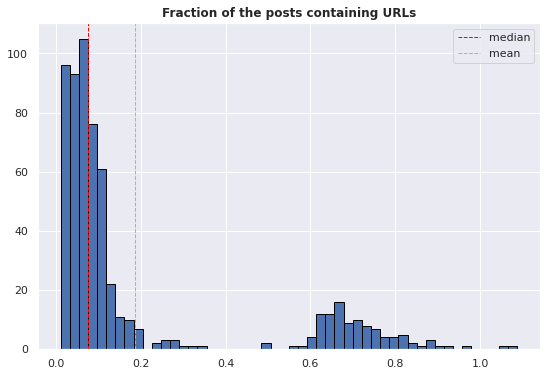

In [12]:
plt.figure(figsize=(9,6))
plt.hist(data['fpurls'], bins=50, ec='black')
plt.axvline(data['fpurls'].median(), color='red', linestyle='--', linewidth=1, label='median')
plt.axvline(data['fpurls'].mean(), color='violet', linestyle='--', linewidth=1, label='mean')

plt.title("Fraction of the posts containing URLs", fontweight='bold')
plt.legend();

data['fpurls'].fillna(data['fpurls'].median(), inplace=True)

**Treatment of Imbalanced Class**

Imbalanced datasets are those where there is a severe skew in the class distribution. This classification has two classes which is also called as a binary classification, the sizes of these two classes are important factors in machine learning, and terefore requires treatment to make an effective classification model. 

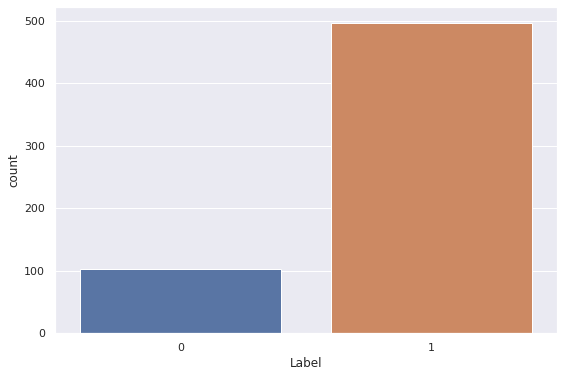

In [13]:
dummy_categorical(data)
plt.figure(figsize=(9,6))
sns.countplot(x=data['Label']);

In [14]:
features = data.columns[:-1]
target = data['Label'].name
X, y = resample(data[features], data[target])[features], resample(data[features], data[target])[target] 
pd.DataFrame([i for i in y.value_counts()], index=['Legitimate', 'Fake'], columns=['Count'])

,Count
Legitimate,497
Fake,497


To treat class imbalance, the proponents has two options, to do oversampling, or to do undersampling. Since there are only 600 data points for this dataset which is considerably small, the proponents then decide to do oversampling using SMOTE or `Synthetic Minority Over-sampling Technique`. This technique works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

**Feature Scaling**

> Rule of thumb: Use StandardScaler for normally distributed data, otherwise use MinMaxScaler. <br>
> –Simon Larsson
 

In [15]:
norm_df = feature_scale(X, y, method='normalize')
print("Normalized: ")
display(norm_df.head(3))

Normalized: 


,#friends,#following,#community,age,#postshared,#urlshared,#photos/videos,fpurls,fpphotos/videos,avgcomment/post,likes/post,tags/post,#tags/post
0,0.006306,0.056298,0.503658,0.029160,0.241885,0.284890,0.223994,0.445069,0.20075,0.000842,0.136397,0.337079,0.419355
1,0.026306,0.065713,0.010129,0.068040,0.058639,0.030221,0.058808,0.296332,0.35040,0.000752,0.406968,0.000000,0.096774
2,0.053333,0.084542,0.021384,0.132193,0.110995,0.047199,0.100627,0.175484,0.30660,0.000602,0.518162,0.056180,0.193548


**Splitting**

In [16]:
X_norm = norm_df[features]

## **Machine Learning Implementation**
* K-Nearest Neighbor Classifier
* Logistic Regression (L1 & L2)
* Linear SVM Classifier (L1 & L2)
* Decision Tree Classifier
* Random Forest Classifier
* XG-Boost Classifier

In [17]:
# Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import traceback
from tqdm import tqdm
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, make_scorer
import warnings
warnings.filterwarnings("ignore")

In [55]:
# Lengthy Functions

# Compare Models
def compare_models(model_dict, X, y):
    X_train, X_test, y_train, y_test = tts(X,y, random_state=0) # Splitting
    top_predictor = []
    # Only tuned parameters are inside.
    params_tweaked = ['n_neighbors', 
                      'C', 
                      'max_iter', 
                      'penalty', 
                      'solver', 
                      'dual', 
                      'max_depth', 
                      'learning_rate', 
                      'n_estimators']
    # Models that has coefficient attribute.
    with_coefs = ['LogisticRegression L1', 
                  'LogisticRegression L2', 
                  'LinearSVC L1', 
                  'LinearSVC L2', 
                  'LogisticRegression', 
                  'LinearSVC']
    # Models that has feature_importances_ attribute.
    with_feature_importance = ['DecisionTreeClassifier', 
                               'RandomForestClassifier', 
                               'XGBClassifier']
    # Iterate through the passed dictionary parameter and append values inside it.
    for k,v in model_dict.items():
        v.append(v[0].score(X_test, y_test))
        params = v[0].get_params() # dict, get parameters that were used by the models that were isnide the dictionary
        for i,j in params.items(): # iterate inside the `params` dictionary.
            if i in params_tweaked: # Since get_params() takes all paramaters including the default,
                                    # we'll only append the parameters that were tweaked/tuned.
                v.append(f"{i} = {j}") # format: parameter = value
            else:
                pass
        # v.append makes irregular-sized list so we have to device a solution to
        # keep all the parameters that were used inside a single list.
        if k in with_coefs: # check if a model is inside the with_coefs list
            coef = v[0].coef_[0]
            maxi, mini = max(coef), min(coef)
            if 0-mini > maxi-0: # checking the coefficient magnitude by comparing the maximum 
                                # and the minimum points, and who is the farthest to 0.
                top_predictor.append(X.columns[np.argmin(coef)])
                # Minimum point is farther than 0
            else:
                top_predictor.append(X.columns[np.argmax(coef)])
                # Maximum point is farther than 0
                
        # Trained Decision tree and ensemble learning algorithms have feature_importances_ attribute.
        elif k in with_feature_importance:
            # define feature_importances_ per DT algorithm
            feat_impo = v[0].feature_importances_
            # Maximum point will be considered the most important feature.
            top_predictor.append(X.columns[np.argmax(feat_impo)])
        else:
            # Not all models supports attributes like from the linear model's coefficient
            # and the feature_importances of DT algorithms.
            top_predictor.append(None)
            
    model_names = model_dict.keys()
    model_accuracy = [j[1] for i,j in model_dict.items()]
    model_best = [", ".join(b[2:]) for a,b in model_dict.items()]
    pd.set_option('max_colwidth', 500)
    dframe = pd.DataFrame({'Models':model_names, 'Accuracy':model_accuracy, 'Best Parameters':model_best, 'Top Predictor':top_predictor})
    dframe.sort_values('Accuracy', ascending=False, inplace=True)
    return dframe
#-----------------------------------------------------------------------------------------------------
# K-Nearest Neighbors
def try_knn(X,y,trials=50,neighbor_setting=31,return_train=False):
    # docstings
    """
    Returns 2 values [trial_test, get_.params()] if `return_train` = False. \n
    Returns 3 values [trial_train, trial_test, get_.params()]
    """
    try:
        np.random.seed(143)
        ith_score_mean_train ,ith_score_mean_test = [],[]
        for i in tqdm(range(trials)):
            n_setting = range(1,neighbor_setting)
            ith_score_train, ith_score_test = [],[]
            X_train, X_test, y_train, y_test = tts(X,y, random_state=i)
            for n in n_setting:
                model = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)
                model.fit(X_train, y_train)
                ith_score_train.append(model.score(X_train, y_train))
                ith_score_test.append(model.score(X_test, y_test))
            ith_score_mean_train.append(ith_score_train)
            ith_score_mean_test.append(ith_score_test)
        
        trial_train = np.mean(np.array(ith_score_mean_train).T, axis=1)
        trial_test = np.mean(np.array(ith_score_mean_test).T, axis=1)
        optimized_ = KNeighborsClassifier(n_neighbors=np.argmax(trial_test)+1)
        
        title=f"Train and Test Accuracy with {trials} trials"
        
        # calls the defined function in functions_etcetera.py
        plot_try_accuracies(trial_train, trial_test,xlabels=n_setting, title=title)
        
        print(f"Best Accuracy for KNN: {np.max(trial_test)}")
        print(f"Best parameter for n_neighbor: {np.argmax(trial_test)+1}")
        
        if return_train == True:
            return trial_train, trial_test, optimized_.get_params()
        else:
            return trial_test, optimized_.get_params()
            
    except Exception:
        traceback.print_exc()

# Logistic Regression
def try_lr(X, y, C, trials=50, return_train=False, penalty='l2', solver='lbfgs'):
    try:
        np.random.seed(143)
        ith_score_mean_train ,ith_score_mean_test = [],[]
        coefs_mean = []
        for i in tqdm(range(trials)):
            ith_score_train, ith_score_test = [],[]
            coefs = []
            X_train, X_test, y_train, y_test = tts(X,y, random_state=i)
            for c in C:
                lr=LogisticRegression(C=c, penalty=penalty, solver=solver, max_iter=100_000, random_state=0, n_jobs=-1)
                lr.fit(X_train, y_train)
                ith_score_train.append(lr.score(X_train, y_train))
                ith_score_test.append(lr.score(X_test, y_test))
                coefs.append(lr.coef_)
            ith_score_mean_train.append(ith_score_train)
            ith_score_mean_test.append(ith_score_test)
            coefs_mean.append(coefs)
            
        trial_train = np.mean(np.array(ith_score_mean_train).T, axis=1)
        trial_test = np.mean(np.array(ith_score_mean_test).T, axis=1)
        trial_coefs = np.mean(coefs_mean, axis=0)
        optimized_ = LogisticRegression(C=C[np.argmax(trial_test)], penalty=penalty, solver=solver, max_iter=100_000, random_state=0)
        
        title=f"Train and Test Accuracy with {trials} trials"
        plot_try_accuracies(trial_train, trial_test, xlabels=C, title=title)
        
        print(f"Best Accuracy for Logistic Regression: {np.max(trial_test)}")
        print(f"Best parameter for C: {C[np.argmax(trial_test)]}")

        if return_train == True:
            return trial_train, trial_test, trial_coefs, optimized_.get_params()
        else:
            return trial_test, trial_coefs, optimized_.get_params()
            
    except Exception:
        traceback.print_exc()

# Linear Support Vector Machine Classifier
def try_lsvc(X, y, C, trials=50, return_train=False, penalty='l2', dual=True):
    try:
        np.random.seed(143)
        ith_score_mean_train ,ith_score_mean_test = [],[]
        coefs_mean = []
        for i in tqdm(range(trials)):
            ith_score_train, ith_score_test = [],[]
            coefs = []
            X_train, X_test, y_train, y_test = tts(X,y, random_state=i)
            for c in C:
                lsvc=LinearSVC(C=c, penalty=penalty, max_iter=100_000, dual=dual, random_state=0)
                lsvc.fit(X_train, y_train)
                ith_score_train.append(lsvc.score(X_train, y_train))
                ith_score_test.append(lsvc.score(X_test, y_test))
                coefs.append(lsvc.coef_)
            ith_score_mean_train.append(ith_score_train)
            ith_score_mean_test.append(ith_score_test)
            coefs_mean.append(coefs)
            
        trial_train = np.mean(np.array(ith_score_mean_train).T, axis=1)
        trial_test = np.mean(np.array(ith_score_mean_test).T, axis=1)
        trial_coefs = np.mean(coefs_mean, axis=0)
        optimized_ = LinearSVC(C=C[np.argmax(trial_test)], penalty=penalty, max_iter=100_000, dual=dual, random_state=0)
        
        title=f"Train and Test Accuracy with {trials} trials"
        plot_try_accuracies(trial_train, trial_test, xlabels=C, title=title)
        
        print(f"Best Accuracy for Linear SVC: {np.max(trial_test)}")
        print(f"Best parameter for C: {C[np.argmax(trial_test)]}")

        if return_train == True:
            return trial_train, trial_test, trial_coefs, optimized_.get_params()
        else:
            return trial_test, trial_coefs, optimized_.get_params()
            
    except Exception:
        traceback.print_exc()

# Decision Tree
def try_dt(X, y, trials=50, max_depth=51, return_train=False):
    try:
        np.random.seed(143)
        ith_score_mean_train ,ith_score_mean_test = [],[]
        for i in tqdm(range(trials)):
            m_depth = range(1,max_depth)
            ith_score_train, ith_score_test = [],[]
            X_train, X_test, y_train, y_test = tts(X,y, random_state=i)
            for m in m_depth:
                dt=DecisionTreeClassifier(max_depth=m, random_state=0)
                dt.fit(X_train, y_train)
                ith_score_train.append(dt.score(X_train, y_train))
                ith_score_test.append(dt.score(X_test, y_test))
            ith_score_mean_train.append(ith_score_train)
            ith_score_mean_test.append(ith_score_test)
            
        trial_train = np.mean(np.array(ith_score_mean_train).T, axis=1)
        trial_test = np.mean(np.array(ith_score_mean_test).T, axis=1)
        optimized_ = DecisionTreeClassifier(max_depth=np.argmax(trial_test)+1, random_state=0)
            
        title=f"Train and Test Accuracy with {trials} trials"
        plot_try_accuracies(trial_train, trial_test, xlabels=m_depth, title=title)
        
        print(f"Best Accuracy for Decision Tree Classifier: {np.max(trial_test)}")
        print(f"Best parameter for max_depth: {np.argmax(trial_test)+1}")
        
        if return_train == True:
            return trial_train, trial_test, optimized_.get_params()
        else:
            return trial_test, optimized_.get_params()
        
    except Exception:
        traceback.print_exc()

# Random Forest
def try_rf(X, y, trials=50, max_depth=51, return_train=False):
    try:
        np.random.seed(143)
        ith_score_mean_train ,ith_score_mean_test = [],[]
        for i in tqdm(range(trials)):
            m_depth = range(1, max_depth)
            ith_score_train, ith_score_test = [],[]
            X_train, X_test, y_train, y_test = tts(X,y, random_state=i)
            for m in m_depth:
                rf=RandomForestClassifier(max_depth=m, random_state=0)
                rf.fit(X_train, y_train)
                ith_score_train.append(rf.score(X_train, y_train))
                ith_score_test.append(rf.score(X_test, y_test))
            ith_score_mean_train.append(ith_score_train)
            ith_score_mean_test.append(ith_score_test)
            
        trial_train = np.mean(np.array(ith_score_mean_train).T, axis=1)
        trial_test = np.mean(np.array(ith_score_mean_test).T, axis=1)
        optimized_ = RandomForestClassifier(max_depth=np.argmax(trial_test)+1, random_state=0)
        
        title=f"Train and Test Accuracy with {trials} trials"
        plot_try_accuracies(trial_train, trial_test, xlabels=m_depth, title=title)
        
        print(f"Best Accuracy for Decision Tree Classifier: {np.max(trial_test)}")
        print(f"Best parameter for max_depth: {np.argmax(trial_test)+1}")
        
        if return_train == True:
            return trial_train, trial_test, optimized_.get_params()
        else:
            return trial_test, optimized_.get_params()
        
    except Exception:
        traceback.print_exc()
#-----------------------------------------------------------------------------------------------------

def plot_try_accuracies(train_acc, test_acc, xlabels, title):
    
    """Accepts two 1D arrays with the same lengths from a trial function
    and returns a line plot of the arrays. \n
    Parameters
    ----------
    train_acc: 1D array or list, the train accuracies from a trial function.
    test_acc: 1D array or list, the test accuracies from a trial function.
    xlabels: 1D array or list of labels for the x ticks.
    title: str, title for the plot
    """
    sns.set()
    plt.figure(figsize=(9,6))
    plt.plot(train_acc, '-o', label="Train Accuracy")
    plt.plot(test_acc, '--o', label="Test Accuracy")
    plt.axvline(np.argmax(test_acc), label='Optimal Value', linestyle='--', linewidth=1, color='red')
    plt.xticks(ticks=range(len(xlabels)), labels=list(xlabels))
    plt.legend()
    plt.title(f"{title}", fontsize=15, fontweight='bold')
    plt.show()
    
def get_img(path):
    image = Image.open(path)
    return image
    
def plot_coefs(coefs, xlabel, C_params, reg=None, method='plt', return_df=False):
    import os
    import plotly.express as px
    import plotly.graph_objects as go
    """Plot coefficient values from a linear classification model (try_lsvc(), try_lr()),
    and returns an interactive plot if `method` is changed to `plotly` and `interactive` to
    True. \n
    Parameters
    ----------
    coefs: 3D array of coefficient, check if it's 3D before you pass the parameter using
    numpy.ndim(coefs).\n
    xlabel: 1D array or list of feature names.\n
    C_params: 1D array or list of C parameters.\n
    reg: str, default=None, name of the regularization and the model. (ex: Linear SVC (L1)).\n
    method: str, default='plt', choose between 'plt' and 'plotly', 'plt' for non-interactive plot,'plotly' for interactive plot.\n
    return_df: bool, default=False, if you want to return the dataframe.\n
    interactive: bool, default=True, method='plotly' and interactive=True will return a plotly
    graph but non-interactive.
    """
    
    try:
        if method == 'plt':
            return_df = False
            plt.figure(figsize=(9, 6))
            for i in range(len(coefs)):
                plt.plot(coefs[i][0], '--o', label=C_params[i])
                plt.legend(loc='upper left')
                plt.xticks(ticks=range(len(xlabel)), labels=list(xlabel), rotation = 45)
                plt.title(f'Coefficient Magnitude of {reg} Regularization', fontsize=15, fontweight='bold');
                
        elif method == 'plotly':
            dframe = pd.DataFrame([list(c[0]) for c in coefs]).T
            dframe.columns = [str(i) for i in C_params]
            dframe.index = xlabel
            
            plotly_fig = px.line(dframe)
            plotly_fig.update_layout(title=f'Coefficient Magnitude of {reg} Regularization',
                                     xaxis_title='Features',
                                     yaxis_title=None,
                                     legend_title='C'
                                     ,hovermode="x")
            plotly_fig.update_traces(mode="markers+lines", hovertemplate=None)
            plotly_fig.show()
            
            if return_df == True:
                return dframe
            
    except Exception:
        traceback.print_exc()
        
def try_optimal(model, X, y, trials=1000):
    try:
        model_mean = []
        model_accuracy = []
        for t in tqdm(range(trials)):
            X_train, X_test, y_train, y_test, = tts (X,y,random_state=t)
            model.fit(X_train, y_train)
            model_accuracy.append(model.score(X_test, y_test))
            model_mean.append(np.mean(model_accuracy))
            
        model_acc_mean = np.round(np.mean(model_accuracy),6)
        plt.figure(figsize=(30,5))
        plt.plot(model_mean)
        plt.axhline(model_acc_mean, color='red', label=f"Converging Point: {model_acc_mean}")
        plt.title(f"Accuracy's Converging Point {trials} Trials", fontweight='bold', fontsize=15)
        plt.legend()
        plt.show()
        
        return model_acc_mean
    
    except Exception:
        traceback.print_exc()
        
def PCC(target, plot=True, title=None):
    """
    Calculates the Proportion Chance Criteria and returns a plot if plot sets to True.
    Parameters
    ----------
    target: pd.Series or np.array of categorical data.
    plot: default, True
    title: str,
    """
    
    from collections import Counter
    state_counts = Counter(target)
    df_state = pd.DataFrame.from_dict(state_counts, orient='index')
    num=(df_state[0]/df_state[0].sum())**2
    ret = 1.25*100*num.sum()
    
    if plot == True:
        plt.figure(figsize=(9,6))
        ax = sns.countplot(x=target)
        ax.bar_label(ax.containers[0])
        plt.title(f"{title}\n(1.25 PCC = {ret}%)", fontsize=15, fontweight='bold')
        plt.xticks(ticks=range(2), labels=['Legitimate', 'Fake'])
        plt.show()
        
def get_performace_measures(matrix): #accepts matrix as a parameter and returns a dataframe of score
    FP = matrix.sum(axis=0) - np.diag(matrix) 
    FN = matrix.sum(axis=1) - np.diag(matrix) 
    TP = np.diag(matrix) 
    TN = matrix.sum() - (FP + FN + TP) 
    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    
    TPR = np.round(TP/(TP+FN)*100,2) 
    TNR = np.round(TN/(TN+FP)*100,2) 
    PPV = np.round(TP/(TP+FP)*100,2) 
    F1 = np.round(2 * (PPV * TPR) / (PPV + TPR),2)
    
    dataframe = pd.DataFrame(data={'Recall':TPR,
                                  'Specificity':TNR,
                                  'Precision':PPV,
                                  'F1-Score':F1},
                            index=['Legitimate', 'Fake'])
    dataframe.fillna(value=0, inplace=True)
    return(dataframe)

In [19]:
# Skip this during execution
import pickle
import time


X_train, X_test, y_train, y_test = tts(X_norm,y, random_state=0)
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=-1,
    seed=0
)

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    scoring = 'roc_auc',
    n_jobs = -1,
    cv = 10,
    verbose=True
)
grid_search.fit(X_train, y_train)
pickle.dump(grid_search, open('xgboost', 'wb'))
grid_search.best_params_

Fitting 10 folds for each of 486 candidates, totalling 4860 fits


{'colsample_bytree': 0.7,
 'max_depth': 15,
 'n_estimators': 400,
 'reg_alpha': 1.3,
 'reg_lambda': 1.1,
 'subsample': 0.9}

### *Trial Accuracies*

**K Nearest Neighbor**

100%|██████████| 50/50 [06:06<00:00,  7.34s/it]


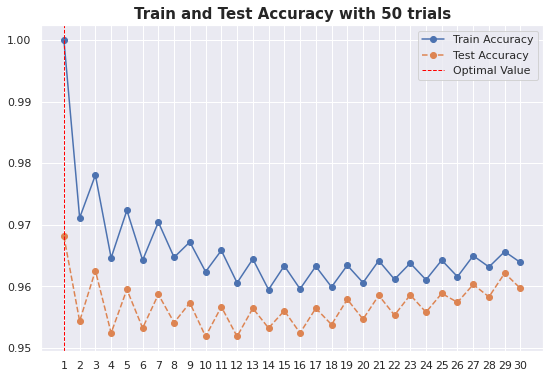

Best Accuracy for KNN: 0.9681124497991968
Best parameter for n_neighbor: 1


In [20]:
knn_test_scores, knn_best_params = try_knn(X_norm, y)

**Logistic Regression L1**

100%|██████████| 50/50 [04:17<00:00,  5.15s/it]


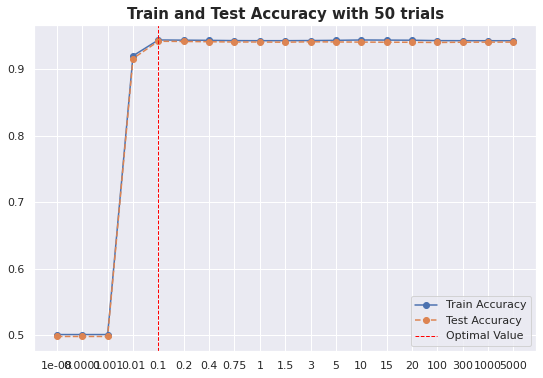

Best Accuracy for Logistic Regression: 0.9418473895582328
Best parameter for C: 0.1


In [21]:
C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
# These values will be used for LinearSVC and Logistic Regression
#-------------------------------------------------------------------------------------------------
lr_l1_test, lr_l1_coefs, lr_l1_best_params = try_lr(X_norm, y, C, penalty='l1', solver='saga')

**Logistic Regression L2**

100%|██████████| 50/50 [00:43<00:00,  1.16it/s]


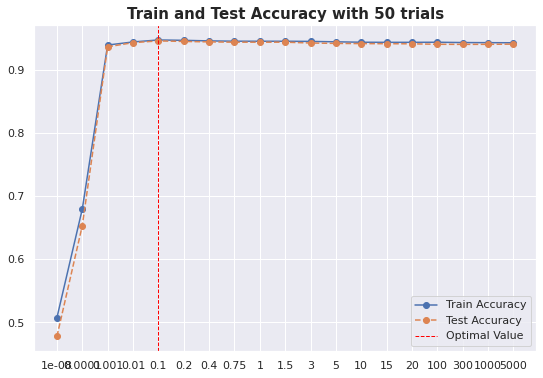

Best Accuracy for Logistic Regression: 0.9455421686746989
Best parameter for C: 0.1


In [22]:
lr_l2_test, lr_l2_coefs, lr_l2_best_params = try_lr(X_norm, y, C, penalty='l2', solver='lbfgs')

**Linear SVC L1**

100%|██████████| 50/50 [01:10<00:00,  1.40s/it]


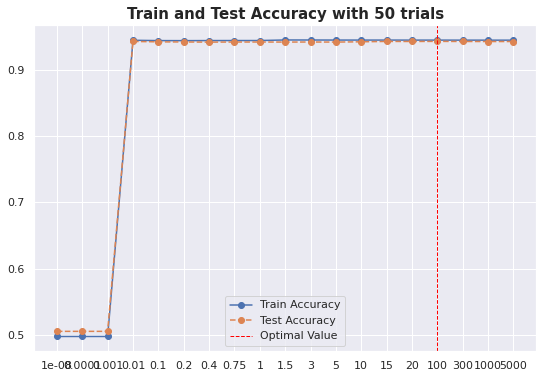

Best Accuracy for Linear SVC: 0.9424096385542168
Best parameter for C: 100


In [23]:
lsvc_l1_test, lsvc_l1_coefs, lsvc_l1_best_params = try_lsvc(X_norm, y, C, penalty='l1', dual=False)

**Linear SVC L2**

100%|██████████| 50/50 [06:14<00:00,  7.49s/it]


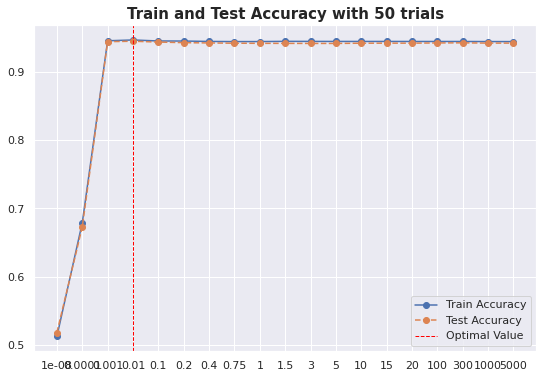

Best Accuracy for Linear SVC: 0.9446586345381527
Best parameter for C: 0.01


In [24]:
lsvc_l2_test, lsvc_l2_coefs, lsvc_l2_best_params = try_lsvc(X_norm, y, C, penalty='l2')

**Decision Tree**

100%|██████████| 50/50 [00:24<00:00,  2.01it/s]


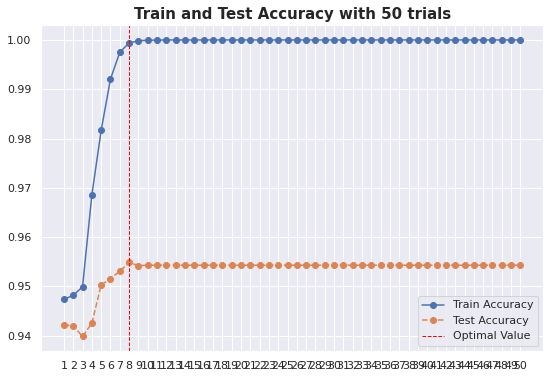

Best Accuracy for Decision Tree Classifier: 0.9548594377510038
Best parameter for max_depth: 8


In [25]:
dt_test, dt_best_params = try_dt(X_norm, y)

**Random Forest**

100%|██████████| 50/50 [12:27<00:00, 14.96s/it]


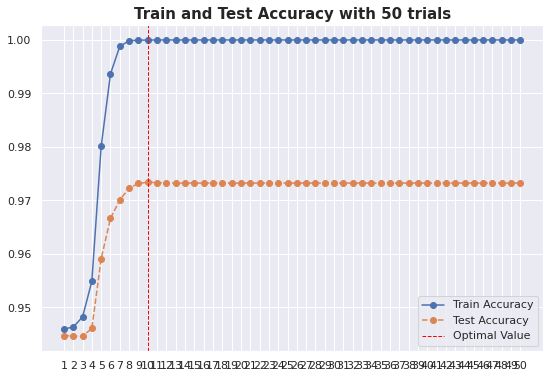

Best Accuracy for Decision Tree Classifier: 0.9734136546184742
Best parameter for max_depth: 10


In [26]:
rf_test, rf_best_params = try_rf(X_norm, y)

### *Feature Importance of Linear Models:*
##### *model.coef_*

In [56]:
linear_model_coefs = {
    "Logistic Regression L1":lr_l1_coefs,
    "Logistic Regression L2":lr_l2_coefs,
    "LinearSVC L1":lsvc_l1_coefs,
    "LinearSVC L2":lsvc_l2_coefs,
}
for text, coef in linear_model_coefs.items():
    plot_coefs(coef, X_norm.columns, C, reg=text, method='plotly')
    # Try method='plotly' and interactive=True

The trade-off parameter that determines the strength of the regularization is called 𝐶 and the higher values of 𝐶 correspond to less regularization.

For feature importance, the higher the parameter value for C, the better the model recognize the features that contributes to the prediction.

### *Optimal Parameter Implementation*

In [40]:
X_train, X_test, y_train, y_test = tts(X_norm, y, random_state=0)
knn_opt = KNeighborsClassifier(**knn_best_params).fit(X_train, y_train)
lrl1_opt = LogisticRegression(**lr_l1_best_params).fit(X_train, y_train)
lrl2_opt = LogisticRegression(**lr_l2_best_params).fit(X_train, y_train)
lsvcl1_opt = LinearSVC(**lsvc_l1_best_params).fit(X_train, y_train)
lsvcl2_opt = LinearSVC(**lsvc_l2_best_params).fit(X_train, y_train)
dt_opt = DecisionTreeClassifier(**dt_best_params).fit(X_train, y_train)
rf_opt = RandomForestClassifier(**rf_best_params).fit(X_train, y_train)
xgb_opt = XGBClassifier(**grid_search.best_params_).fit(X_train, y_train)

model_dict = {
    'KNeighborsClassifier':[knn_opt],
    'LogisticRegression L1':[lsvcl1_opt],
    'LogisticRegression L2':[lrl2_opt],
    'LinearSVC L1':[lsvcl1_opt],
    'LinearSVC L2':[lsvcl2_opt],
    'DecisionTreeClassifier':[dt_opt],
    'RandomForestClassifier':[rf_opt],
    'XGBClassifier':[xgb_opt]
}
compare_models(model_dict, X_norm, y)

,Models,Accuracy,Best Parameters,Top Predictor
6,RandomForestClassifier,0.975904,"max_depth = 10, n_estimators = 100",#urlshared
7,XGBClassifier,0.975904,"learning_rate = 0.300000012, max_depth = 15, n_estimators = 400",#urlshared
0,KNeighborsClassifier,0.963855,n_neighbors = 1,None
2,LogisticRegression L2,0.951807,"C = 0.1, dual = False, max_iter = 100000, penalty = l2, solver = lbfgs",fpurls
4,LinearSVC L2,0.947791,"C = 0.01, dual = True, max_iter = 100000, penalty = l2",fpurls
5,DecisionTreeClassifier,0.947791,max_depth = 8,#friends
1,LogisticRegression L1,0.943775,"C = 100, dual = False, max_iter = 100000, penalty = l1",avgcomment/post
3,LinearSVC L1,0.943775,"C = 100, dual = False, max_iter = 100000, penalty = l1",avgcomment/post


## **Proportion Chance Criteria**

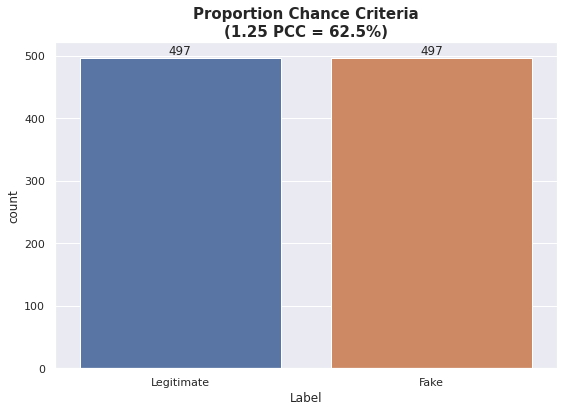

In [41]:
PCC(y, title="Proportion Chance Criteria")

## **Feature Importance of the Top Models**

In [42]:
def dt_algo_FI(dt_algo, name):
    dframe = pd.DataFrame([X.columns, dt_algo.feature_importances_]).T
    dframe.columns = ['Features', 'Importance']
    dframe.sort_values('Importance', ascending=False, inplace=True)
    plt.figure(figsize=(9,6))
    sns.barplot(data=dframe, x='Importance', y='Features')
    plt.xticks(rotation=90);
    plt.title(f"{name} Feature Importance")

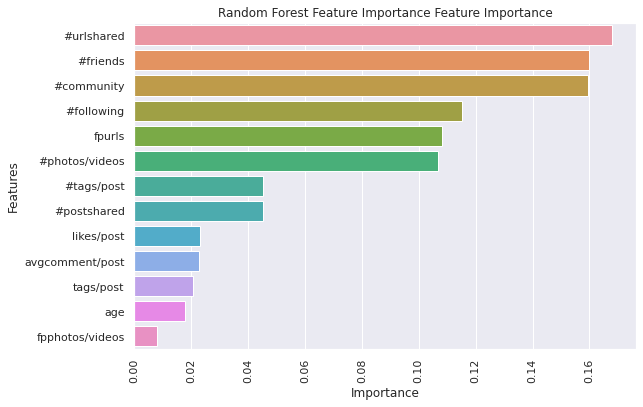

In [43]:
dt_algo_FI(rf_opt, "Random Forest Feature Importance")

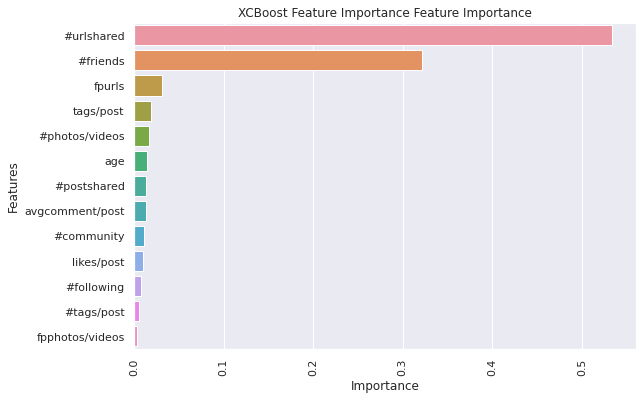

In [44]:
dt_algo_FI(xgb_opt, "XCBoost Feature Importance")

**Shap**

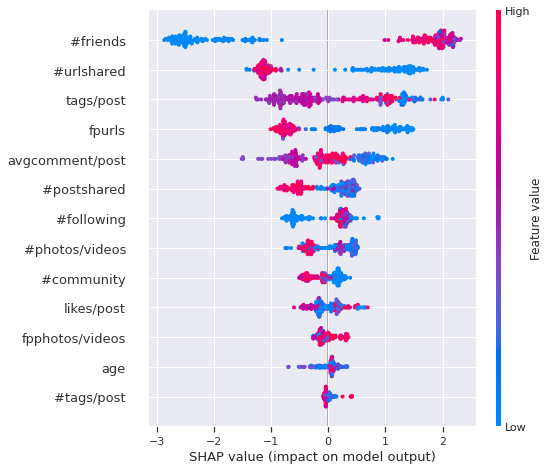

In [45]:
import shap

X_train, X_test, y_train, y_test = tts(X_norm, y, random_state=0)
explainer = shap.TreeExplainer(xgb_opt, X_test)

values = explainer.shap_values(X_test, check_additivity=False)
shap.summary_plot(values, X_test)

# Evaluation

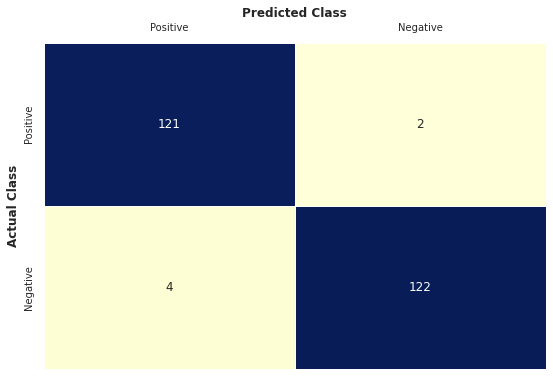

In [46]:
# Confusion Matrix
from sklearn import metrics

X_train, X_test, y_train, y_test = tts(X_norm, y, random_state=0)
y_pred = rf_opt.predict(X_test)

axis_labels=["Positive", "Negative"]
plt.figure(figsize=(9,6))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred),
            annot=True, 
            fmt='d', 
            cmap='YlGnBu',
            cbar=False,
            linewidth=0.5, 
            xticklabels=axis_labels, 
            yticklabels=axis_labels)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.ylabel('Actual Class', fontweight='bold')
plt.title('Predicted Class', fontweight='bold');

In [47]:
get_performace_measures(metrics.confusion_matrix(y_test, y_pred))

,Recall,Specificity,Precision,F1-Score
Legitimate,98.37,96.83,96.80,97.58
Fake,96.83,98.37,98.39,97.60


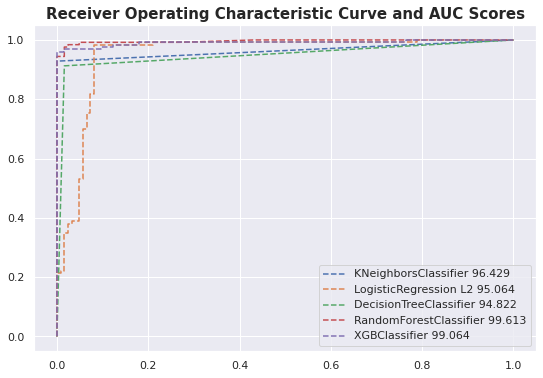

In [48]:
# AUC / ROC
X_train, X_test, y_train, y_test = tts(X_norm, y, random_state=0)

model_with_pred_prob = {k:v[0] for k,v in model_dict.items() if 'SVC' not in k and 'LinearSVC' not in str(v)}

pred_probability = []
auc_scores = []
fpr, tpr, thresh = [], [], []

for k,v in model_with_pred_prob.items():
    y_pred = v.predict_proba(X_test)
    pred_probability.append(y_pred)
    auc_scores.append(metrics.roc_auc_score(y_test, y_pred[:,1]))
    fpr_, tpr_, thresh_ = metrics.roc_curve(y_test, y_pred[:,1], pos_label=1)
    fpr.append(fpr_)
    tpr.append(tpr_)
    thresh.append(thresh_)
    
plt.figure(figsize=(9,6))
for i in range(len(model_with_pred_prob)):
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"{list(model_with_pred_prob.keys())[i]} {np.round(auc_scores[i]*100,3)}")
    plt.legend()
    plt.title("Receiver Operating Characteristic Curve and AUC Scores", fontweight='bold', fontsize=15)

## **Conclusion**

Making spam accounts may cause problems, as people may use your image in illegal activities, obtain your information without your permission, and so on. The number of Friends contributed significantly to the prediction process of some models, therefore an account with a low number of friends is most likely a fake account, but also the number of friends is not the only characteristic of a fake account or a legitimate account. Features like the number of communities, and the fraction of posts containing a URL, do also have significant weights for classifying a Facebook profile. This study concludes that fake accounts could easily know when it comes to the numbers of friends that were also tested in this study and with the help of the features that was tested by the researchers.<br>

XGBoost has a maximum accuracy of 97.99% which outperformed and topped the other models that we trained.

## **References**

* Lua, A. (2022, March 16). 21 top social media sites to consider for your brand -. Buffer Library. Retrieved June 21, 2022, from https://buffer.com/library/social-media-sites/#:~:text=Facebook%20is%20the%20largest%20social,world's%20population%20are%20Facebook%20users.
<br><br>
* Tucker, J. (2021, December 1). What the tech? Facebook's problem of fake accounts &amp; how to protect yourself. Local3News.com. Retrieved June 21, 2022, from https://www.local3news.com/local-news/what-the-tech/what-the-tech-facebooks-problem-of-fake-accounts-how-to-protect-yourself/article_99217e2e-7d00-5bd9-afc9-62db59c23c6a.html#:~:text=It's%20well%20known%20that%20scammers,scam%20them%20out%20of%20money. 
<br><br>
* Feature scaling: Standardization vs normalization. Analytics Vidhya. (2022, June 15). Retrieved June 21, 2022, from https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/#:~:text=of%20the%20features!-,What%20is%20Normalization%3F,known%20as%20Min%2DMax%20scaling. 
<br><br>
* Imbalanced classification: Handling imbalanced data using Python. Analytics Vidhya. (2020, July 24). Retrieved June 21, 2022, from https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/ 